In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

# 登月图片处理
- 读取图片、显示
- 灰度化处理
- 降噪处理

In [3]:
moon = plt.imread('data/moonlanding.png')  # ndarray数组
moon

array([[ 0.04705882,  0.        ,  0.23921569, ...,  0.        ,
         0.00392157,  0.53333336],
       [ 0.        ,  0.        ,  0.67843139, ...,  0.10196079,
         0.29019609,  0.        ],
       [ 0.72156864,  0.10980392,  0.60392159, ...,  0.        ,
         0.21568628,  1.        ],
       ..., 
       [ 0.00392157,  0.        ,  1.        , ...,  1.        ,
         1.        ,  0.95686275],
       [ 0.        ,  0.        ,  0.15686275, ...,  0.        ,
         0.        ,  0.35294119],
       [ 1.        ,  0.52156866,  0.04705882, ...,  0.        ,
         0.        ,  1.        ]], dtype=float32)

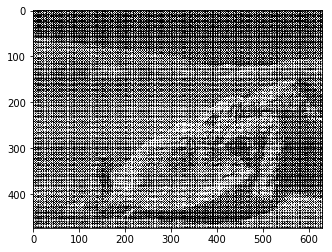

In [8]:
plt.imshow(moon, cmap='gray')  # 显示图片, 灰度显示

In [9]:
moon.shape  # 二维图片

(474, 630)

In [10]:
# 傳立叶变换并降噪处理
from scipy.fftpack import fft2, ifft2

# 将时域数据转成频域数据(实数+虚数)
fft_moon = fft2(moon)

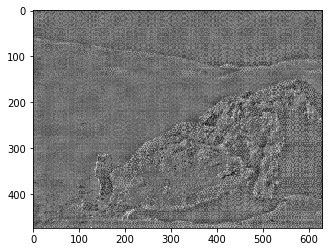

In [19]:
# 降噪处理
# 7e4 降噪的数据参考原数据，可以多次调整
# np.where(条件, True的数据， False的数据)
fft_moon = np.where(np.abs(fft_moon) > 7e4, 0, fft_moon)

# 将频域数据转成时域数据，并且提取实数部分
ff_moon = np.real(ifft2(fft_moon))
plt.imshow(ff_moon, cmap='gray')

# 通过plt画圆
- 确定圆半径 [-1, 1], 半径为1
- 确定函数 f(x) 计算某一x坐标的y坐标值，得到圆上的某一个点(point)

In [20]:
x = np.linspace(-1, 1, num=1000)
y = (lambda x: (1 - x**2)**0.5)(x)  # 计算每一个x与y的坐标

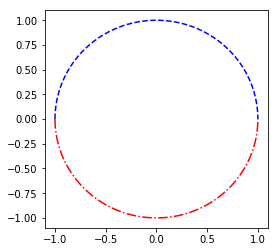

In [37]:
# 绘制
plt.figure(figsize=(4, 4))  # 设置画布大小,单位英寸
plt.plot(x, y,'b--', x, -y, 'r-.')
plt.show()

# scipy.io模块处理mat数据
- 保存mat数据
- 加载mat数据

In [38]:
from scipy import io

In [39]:
# 存储的是二进制数据
io.savemat('moon.mat', {
    'moon': ff_moon,
    'title': '登月降噪图片'
})

['登月降噪图片']


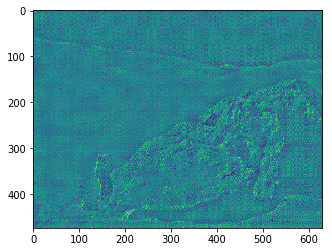

In [40]:
mat = io.loadmat('moon.mat')
print(mat.get('title'))
plt.imshow(mat.get('moon'))

# scipy.ndimage图片处理

In [41]:
from scipy.misc import face 
from scipy import ndimage

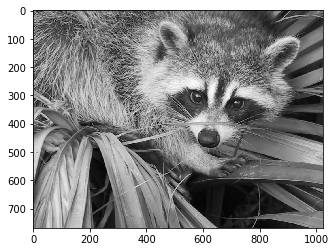

In [44]:
# 获取face图片
face_img = face(gray=True) # gray=True 灰度处理
plt.imshow(face_img, cmap='gray')

## shift() 移动图片
- mode 指定空白位置的数据显示的模式

In [48]:
face_img.shape

(768, 1024)

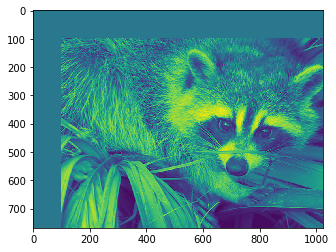

In [64]:
# mode {'constant',
#       'nearest', 'reflect', 'mirror' or 'wrap'}
plt.imshow(ndimage.shift(face_img, (100, 100),
                         mode='constant', cval=100))

## 图片旋转 rotate()
- angle角度,  正值为逆时针方向， 负值为顺时针方向

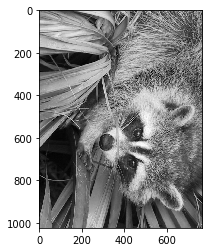

In [71]:
plt.imshow(ndimage.rotate(face_img, -90, mode='nearest'),
          cmap='gray')

## 图片缩放 zoom()

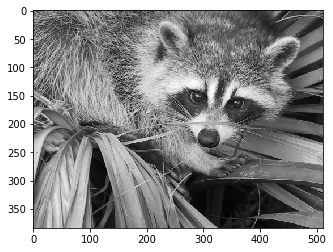

In [73]:
plt.imshow(ndimage.zoom(face_img, 0.5), cmap='gray')

练习： 将face正脸切片出来，使用shift()、rotate()、zoom()修改图片，并使用plt显示出来（1行4列）

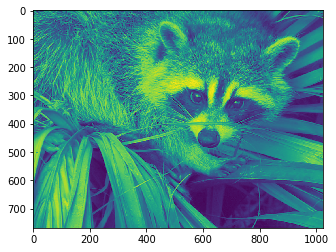

In [77]:
plt.imshow(face_img)

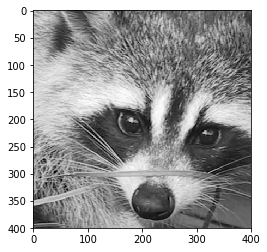

In [79]:
front_face = face_img[100:500, 400:800]
plt.imshow(front_face, cmap='gray')

In [80]:
# 向正下方移动100像素
shift_face = ndimage.shift(front_face, (100, 100))

# 将图片按顺时针旋转45度
rotate_face = ndimage.rotate(front_face, angle=-45)

# 将图片缩小原大小的0.5倍
zoom_face = ndimage.zoom(front_face, (0.5, 0.5))

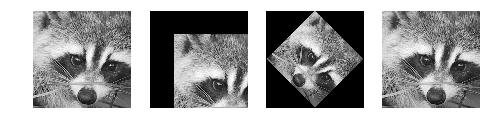

In [82]:
# 显示图片
faces = [front_face, shift_face, rotate_face, zoom_face]
plt.figure(figsize=(8, 4))  # figsize = (width, height)

for index, face_ in enumerate(faces):
    # 创建子画布
    plt.subplot(1,4, index+1)  # subplot(rows, columns, index)
    
    # 在子画布显示图片
    plt.imshow(face_, cmap='gray')
    
    # 取消坐标轴
    plt.axis('off')

plt.show()

## 图片过滤 filter
- 高斯过滤(波)
- 中值过滤(波)
- 维纳过滤(波)

In [83]:
from scipy import signal

ndimage.gaussian_filter()  # 高斯过滤
ndimage.median_filter() # 中值过滤
signal.wiener() # 维纳过滤

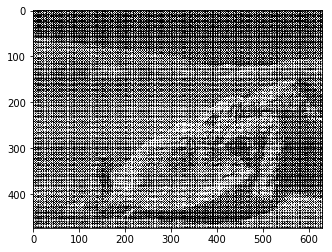

In [84]:
plt.imshow(moon, cmap='gray')

In [95]:
# 高斯过滤
gaussian = ndimage.gaussian_filter(moon, sigma=2)
# 中值过滤
median = ndimage.median_filter(moon, size=(10, 10))
# 维纳过滤
wiener = signal.wiener(moon, mysize=(8, 8))

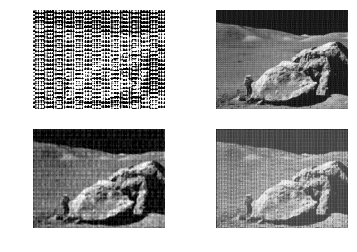

In [103]:
moons = [moon, gaussian, median, wiener]
plt.figure(figsize=(6, 4))
# 显示2行2列的画布
# figure, axes = plt.subplots(2, 2) # 创建画布及四个子画布(坐标系)
for index, moon_ in enumerate(moons):
    plt.subplot(2, 2, index+1)
    plt.imshow(moon_,cmap='gray')
    plt.axis('off')

plt.show()

## 扩展： 对一张图片进行加噪

In [118]:
def roise(X, p):
    # A 期望值, k系数(方差), delta 相角
    A, k, delta = p
    return A*np.sin(2*np.pi*k*X+delta)

In [132]:
roise_ = roise(front_face, (100, 0.35, 0))

In [133]:
face_roise = front_face.astype(np.float64)+ roise_

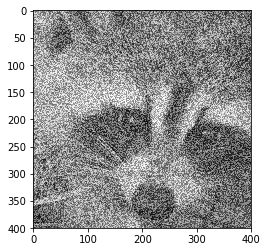

In [134]:
plt.imshow(face_roise, cmap='gray')

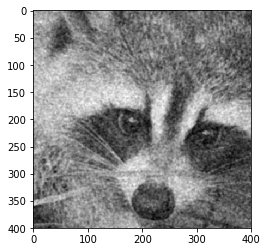

In [142]:
plt.imshow(ndimage.gaussian_filter(face_roise, sigma=1.35),
          cmap='gray')

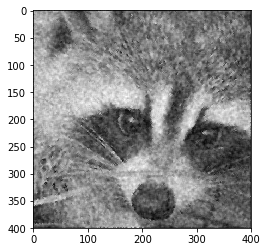

In [145]:
plt.imshow(signal.wiener(face_roise, mysize=(5, 5)),
          cmap='gray')